In [ ]:
!pip install tensorflow==2.0.0-alpha # for colab

In [1]:

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 5000
maxlen = 400

print('Loading data...')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
print(len(train_data), 'train sequences')
print(len(test_data), 'test sequences')

print('Pad sequences (samples x time)')
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)
print('train_data shape:', train_data.shape)
print('test_data shape:', test_data.shape)

train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

print(train_data[0])
print(test_data[0])


Loading data...


25000 train sequences
25000 test sequences
Pad sequences (samples x time)


train_data shape: (25000, 400)
test_data shape: (25000, 400)


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4 

In [2]:

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

W0318 19:29:56.370296 140647850673920 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

train_data = pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=256)
test_data = pad_sequences(test_data, 
                                                       value=word_index["<PAD>"], 
                                                       padding='post',
                                                       maxlen=256)


print(len(train_data[0]), len(train_data[1]))


W0318 19:29:56.370296 140647850673920 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, \
    Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Embedding
from tensorflow.nn import relu, sigmoid
from tensorflow.keras.backend import binary_crossentropy


# set parameters:
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250




# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = Sequential()
model.add(Embedding(vocab_size, 16))
#model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
#model.add(Dropout(0.2))
#model.add(Conv1D(filters, kernel_size, padding='valid', activation=relu, strides=1))
#model.add(GlobalMaxPooling1D())
model.add(GlobalAveragePooling1D())
#model.add(Dense(250, activation=relu))
#model.add(Dropout(0.2))
model.add(Dense(16, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.summary()

model.compile(optimizer='adam',
              loss=binary_crossentropy,
              metrics=['accuracy']
              )


W0318 19:29:56.370296 140647850673920 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [10]:
partial_validation_data = train_data[:10000]
partial_train_data = train_data[10000:]

partial_validation_labels = train_labels[:10000]
partial_train_labels = train_labels[10000:]

In [11]:
batch_size = 512 # 32
epochs=40 # 2

history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(partial_validation_data, partial_validation_labels),
                    verbose=1)
# history = model.fit(test_data, test_labels, batch_size=batch_size, epochs=epochs, verbose=1)
model.evaluate(test_data, test_labels)

Train on 15000 samples, validate on 10000 samples


Epoch 1/40


  512/15000 [>.............................] - ETA: 19s - loss: 0.6933 - acc: 0.4941

 2048/15000 [===>..........................] - ETA: 4s - loss: 0.6932 - acc: 0.4966 

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.6930 - acc: 0.5218

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.6929 - acc: 0.5230

 6656/15000 [============>.................] - ETA: 1s - loss: 0.6929 - acc: 0.5237

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6927 - acc: 0.5300

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6927 - acc: 0.5321

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6926 - acc: 0.5375

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6924 - acc: 0.5384

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6924 - acc: 0.5355

15000/15000 [==============================] - 1s 93us/sample - loss: 0.6923 - acc: 0.5345 - val_loss: 0.6913 - val_acc: 0.5218


Epoch 2/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6907 - acc: 0.5410

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6910 - acc: 0.5215

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6909 - acc: 0.5326

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6906 - acc: 0.5482

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6903 - acc: 0.5575

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6902 - acc: 0.5560

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6901 - acc: 0.5575

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6899 - acc: 0.5692

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6897 - acc: 0.5802

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6894 - acc: 0.5899

15000/15000 [==============================] - 1s 46us/sample - loss: 0.6893 - acc: 0.5933 - val_loss: 0.6873 - val_acc: 0.6272


Epoch 3/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6864 - acc: 0.6367

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6860 - acc: 0.6235

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6856 - acc: 0.6189

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6854 - acc: 0.6178

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6852 - acc: 0.6152

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6848 - acc: 0.6180

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6843 - acc: 0.6263

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6841 - acc: 0.6310

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6836 - acc: 0.6390

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6830 - acc: 0.6490

15000/15000 [==============================] - 1s 47us/sample - loss: 0.6827 - acc: 0.6517 - val_loss: 0.6788 - val_acc: 0.7021


Epoch 4/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6763 - acc: 0.7266

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6762 - acc: 0.7114

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6755 - acc: 0.6936

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6748 - acc: 0.6807

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6751 - acc: 0.6617

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6738 - acc: 0.6632

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6734 - acc: 0.6644

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6727 - acc: 0.6709

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6716 - acc: 0.6804

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6706 - acc: 0.6892

15000/15000 [==============================] - 1s 46us/sample - loss: 0.6702 - acc: 0.6917 - val_loss: 0.6633 - val_acc: 0.7386


Epoch 5/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6614 - acc: 0.7383

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6583 - acc: 0.7563

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6581 - acc: 0.7480

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6574 - acc: 0.7447

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6560 - acc: 0.7441

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6554 - acc: 0.7419

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6541 - acc: 0.7436

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6527 - acc: 0.7443

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6512 - acc: 0.7466

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6501 - acc: 0.7477

15000/15000 [==============================] - 1s 46us/sample - loss: 0.6493 - acc: 0.7487 - val_loss: 0.6404 - val_acc: 0.7534


Epoch 6/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6297 - acc: 0.7715

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6320 - acc: 0.7671

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6323 - acc: 0.7640

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6317 - acc: 0.7627

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6297 - acc: 0.7658

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6287 - acc: 0.7664

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6273 - acc: 0.7676

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6251 - acc: 0.7714

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6234 - acc: 0.7721

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6218 - acc: 0.7718

15000/15000 [==============================] - 1s 46us/sample - loss: 0.6206 - acc: 0.7726 - val_loss: 0.6107 - val_acc: 0.7632


Epoch 7/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6133 - acc: 0.7715

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.5982 - acc: 0.7964

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6000 - acc: 0.7787

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.5963 - acc: 0.7824

 6656/15000 [============>.................] - ETA: 0s - loss: 0.5950 - acc: 0.7803

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.5938 - acc: 0.7794

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5914 - acc: 0.7827

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5888 - acc: 0.7855

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5867 - acc: 0.7872

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5853 - acc: 0.7868

15000/15000 [==============================] - 1s 47us/sample - loss: 0.5845 - acc: 0.7876 - val_loss: 0.5739 - val_acc: 0.7926


Epoch 8/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.5622 - acc: 0.8066

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.5560 - acc: 0.8066

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.5601 - acc: 0.8011

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.5575 - acc: 0.8035

 6656/15000 [============>.................] - ETA: 0s - loss: 0.5545 - acc: 0.8048

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.5526 - acc: 0.8063

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5505 - acc: 0.8072

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5483 - acc: 0.8101

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5460 - acc: 0.8109

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5447 - acc: 0.8112

15000/15000 [==============================] - 1s 47us/sample - loss: 0.5433 - acc: 0.8125 - val_loss: 0.5344 - val_acc: 0.8077


Epoch 9/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.5147 - acc: 0.8242

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.5169 - acc: 0.8203

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.5130 - acc: 0.8315

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.5118 - acc: 0.8301

 6656/15000 [============>.................] - ETA: 0s - loss: 0.5104 - acc: 0.8295

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.5079 - acc: 0.8295

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5052 - acc: 0.8306

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5044 - acc: 0.8282

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5021 - acc: 0.8303

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5009 - acc: 0.8300

15000/15000 [==============================] - 1s 46us/sample - loss: 0.5003 - acc: 0.8305 - val_loss: 0.4953 - val_acc: 0.8221


Epoch 10/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4732 - acc: 0.8535

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.4705 - acc: 0.8428

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4743 - acc: 0.8373

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.4729 - acc: 0.8418

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4688 - acc: 0.8453

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.4668 - acc: 0.8434

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4667 - acc: 0.8428

11264/15000 [=====================>........] - ETA: 0s - loss: 0.4651 - acc: 0.8432

12800/15000 [========================>.....] - ETA: 0s - loss: 0.4627 - acc: 0.8440

14336/15000 [===========================>..] - ETA: 0s - loss: 0.4611 - acc: 0.8448

15000/15000 [==============================] - 1s 46us/sample - loss: 0.4598 - acc: 0.8457 - val_loss: 0.4606 - val_acc: 0.8329


Epoch 11/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4295 - acc: 0.8555

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.4366 - acc: 0.8442

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4374 - acc: 0.8432

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.4341 - acc: 0.8496

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4337 - acc: 0.8502

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.4332 - acc: 0.8503

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4315 - acc: 0.8514

10752/15000 [====================>.........] - ETA: 0s - loss: 0.4297 - acc: 0.8525

11776/15000 [======================>.......] - ETA: 0s - loss: 0.4284 - acc: 0.8535

13312/15000 [=========================>....] - ETA: 0s - loss: 0.4262 - acc: 0.8548

14848/15000 [============================>.] - ETA: 0s - loss: 0.4240 - acc: 0.8561

15000/15000 [==============================] - 1s 47us/sample - loss: 0.4241 - acc: 0.8559 - val_loss: 0.4303 - val_acc: 0.8443


Epoch 12/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3971 - acc: 0.8789

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.4102 - acc: 0.8618

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4048 - acc: 0.8666

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.4039 - acc: 0.8637

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4033 - acc: 0.8672

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.4012 - acc: 0.8654

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3987 - acc: 0.8659

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3968 - acc: 0.8665

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3957 - acc: 0.8659

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3935 - acc: 0.8668

15000/15000 [==============================] - 1s 46us/sample - loss: 0.3933 - acc: 0.8659 - val_loss: 0.4067 - val_acc: 0.8478


Epoch 13/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3700 - acc: 0.8887

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3699 - acc: 0.8774

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3708 - acc: 0.8719

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3693 - acc: 0.8737

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.3741 - acc: 0.8727

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3702 - acc: 0.8762

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3697 - acc: 0.8762

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3684 - acc: 0.8754

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3679 - acc: 0.8746

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3676 - acc: 0.8741

15000/15000 [==============================] - 1s 46us/sample - loss: 0.3682 - acc: 0.8733 - val_loss: 0.3851 - val_acc: 0.8542


Epoch 14/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.3517 - acc: 0.8926

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3548 - acc: 0.8896

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3523 - acc: 0.8823

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3530 - acc: 0.8781

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3519 - acc: 0.8795

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3492 - acc: 0.8804

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3480 - acc: 0.8809

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3461 - acc: 0.8816

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3463 - acc: 0.8798

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3457 - acc: 0.8807

15000/15000 [==============================] - 1s 46us/sample - loss: 0.3460 - acc: 0.8803 - val_loss: 0.3696 - val_acc: 0.8574


Epoch 15/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3348 - acc: 0.8945

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3410 - acc: 0.8804

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3345 - acc: 0.8836

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3324 - acc: 0.8820

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3314 - acc: 0.8827

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3335 - acc: 0.8794

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3343 - acc: 0.8787

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3316 - acc: 0.8809

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3309 - acc: 0.8820

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3292 - acc: 0.8834

15000/15000 [==============================] - 1s 46us/sample - loss: 0.3282 - acc: 0.8839 - val_loss: 0.3562 - val_acc: 0.8648


Epoch 16/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3364 - acc: 0.8574

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3317 - acc: 0.8735

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3204 - acc: 0.8828

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3186 - acc: 0.8861

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3146 - acc: 0.8879

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3130 - acc: 0.8881

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3117 - acc: 0.8883

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3127 - acc: 0.8875

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3123 - acc: 0.8877

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3130 - acc: 0.8880

15000/15000 [==============================] - 1s 47us/sample - loss: 0.3125 - acc: 0.8878 - val_loss: 0.3456 - val_acc: 0.8654


Epoch 17/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3059 - acc: 0.8770

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3114 - acc: 0.8833

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3060 - acc: 0.8903

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3035 - acc: 0.8924

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3060 - acc: 0.8912

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3039 - acc: 0.8907

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3020 - acc: 0.8911

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3011 - acc: 0.8926

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3002 - acc: 0.8918

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2993 - acc: 0.8917

15000/15000 [==============================] - 1s 47us/sample - loss: 0.2984 - acc: 0.8926 - val_loss: 0.3368 - val_acc: 0.8678


Epoch 18/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2658 - acc: 0.9277

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2795 - acc: 0.9038

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2899 - acc: 0.8984

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2885 - acc: 0.8982

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2862 - acc: 0.8978

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2874 - acc: 0.8962

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2892 - acc: 0.8944

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2882 - acc: 0.8946

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2880 - acc: 0.8948

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2871 - acc: 0.8964

15000/15000 [==============================] - 1s 46us/sample - loss: 0.2863 - acc: 0.8972 - val_loss: 0.3289 - val_acc: 0.8710


Epoch 19/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2743 - acc: 0.9199

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2757 - acc: 0.9038

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2790 - acc: 0.9018

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2779 - acc: 0.8992

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2733 - acc: 0.9014

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2761 - acc: 0.8990

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2734 - acc: 0.9012

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2740 - acc: 0.9006

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2745 - acc: 0.9002

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2763 - acc: 0.8989

15000/15000 [==============================] - 1s 47us/sample - loss: 0.2756 - acc: 0.8997 - val_loss: 0.3224 - val_acc: 0.8727


Epoch 20/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2656 - acc: 0.9062

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2692 - acc: 0.9067

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2682 - acc: 0.9046

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2710 - acc: 0.9020

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2682 - acc: 0.9026

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2669 - acc: 0.9033

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2651 - acc: 0.9033

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2662 - acc: 0.9026

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2671 - acc: 0.9019

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2682 - acc: 0.9014

15000/15000 [==============================] - 1s 46us/sample - loss: 0.2660 - acc: 0.9025 - val_loss: 0.3177 - val_acc: 0.8733


Epoch 21/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2510 - acc: 0.9121

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2512 - acc: 0.9160

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2535 - acc: 0.9146

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2555 - acc: 0.9076

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2553 - acc: 0.9085

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2540 - acc: 0.9095

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2547 - acc: 0.9094

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2561 - acc: 0.9078

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2558 - acc: 0.9084

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2561 - acc: 0.9074

15000/15000 [==============================] - 1s 46us/sample - loss: 0.2566 - acc: 0.9069 - val_loss: 0.3138 - val_acc: 0.8757


Epoch 22/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2458 - acc: 0.9219

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2551 - acc: 0.9116

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2494 - acc: 0.9124

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2500 - acc: 0.9090

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2485 - acc: 0.9085

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2500 - acc: 0.9072

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2493 - acc: 0.9091

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2518 - acc: 0.9074

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2506 - acc: 0.9078

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2488 - acc: 0.9095

15000/15000 [==============================] - 1s 47us/sample - loss: 0.2487 - acc: 0.9096 - val_loss: 0.3094 - val_acc: 0.8768


Epoch 23/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2405 - acc: 0.9258

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2338 - acc: 0.9219

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2326 - acc: 0.9171

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2339 - acc: 0.9172

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2342 - acc: 0.9177

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2350 - acc: 0.9167

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2373 - acc: 0.9153

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2401 - acc: 0.9135

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2409 - acc: 0.9127

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2406 - acc: 0.9134

15000/15000 [==============================] - 1s 46us/sample - loss: 0.2407 - acc: 0.9127 - val_loss: 0.3070 - val_acc: 0.8764


Epoch 24/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2274 - acc: 0.9082

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2287 - acc: 0.9185

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2343 - acc: 0.9163

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2389 - acc: 0.9131

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2364 - acc: 0.9145

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2362 - acc: 0.9143

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2362 - acc: 0.9148

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2346 - acc: 0.9161

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2348 - acc: 0.9151

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2345 - acc: 0.9143

15000/15000 [==============================] - 1s 46us/sample - loss: 0.2340 - acc: 0.9145 - val_loss: 0.3043 - val_acc: 0.8775


Epoch 25/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2359 - acc: 0.9102

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2256 - acc: 0.9165

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2187 - acc: 0.9205

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2211 - acc: 0.9209

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2225 - acc: 0.9201

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2250 - acc: 0.9181

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2232 - acc: 0.9186

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2247 - acc: 0.9179

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2269 - acc: 0.9166

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2265 - acc: 0.9176

15000/15000 [==============================] - 1s 46us/sample - loss: 0.2270 - acc: 0.9171 - val_loss: 0.3015 - val_acc: 0.8782


Epoch 26/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1993 - acc: 0.9238

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2179 - acc: 0.9180

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2240 - acc: 0.9210

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2258 - acc: 0.9186

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2263 - acc: 0.9171

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2257 - acc: 0.9171

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2254 - acc: 0.9171

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2253 - acc: 0.9173

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2222 - acc: 0.9193

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2211 - acc: 0.9195

15000/15000 [==============================] - 1s 47us/sample - loss: 0.2210 - acc: 0.9199 - val_loss: 0.3010 - val_acc: 0.8786


Epoch 27/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2062 - acc: 0.9219

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2074 - acc: 0.9258

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2206 - acc: 0.9194

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2196 - acc: 0.9217

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2229 - acc: 0.9211

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2230 - acc: 0.9198

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2222 - acc: 0.9198

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2197 - acc: 0.9204

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2175 - acc: 0.9211

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2156 - acc: 0.9216

15000/15000 [==============================] - 1s 47us/sample - loss: 0.2152 - acc: 0.9217 - val_loss: 0.2990 - val_acc: 0.8802


Epoch 28/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1842 - acc: 0.9355

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2095 - acc: 0.9219

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2134 - acc: 0.9210

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2128 - acc: 0.9215

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2128 - acc: 0.9226

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2168 - acc: 0.9203

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2145 - acc: 0.9212

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2137 - acc: 0.9213

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2125 - acc: 0.9220

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2099 - acc: 0.9238

15000/15000 [==============================] - 1s 47us/sample - loss: 0.2097 - acc: 0.9242 - val_loss: 0.2985 - val_acc: 0.8795


Epoch 29/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1850 - acc: 0.9297

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1970 - acc: 0.9326

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2009 - acc: 0.9283

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2019 - acc: 0.9262

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1976 - acc: 0.9274

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2045 - acc: 0.9254

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2017 - acc: 0.9268

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2024 - acc: 0.9266

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2031 - acc: 0.9270

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2041 - acc: 0.9268

15000/15000 [==============================] - 1s 47us/sample - loss: 0.2050 - acc: 0.9264 - val_loss: 0.2984 - val_acc: 0.8785


Epoch 30/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1945 - acc: 0.9297

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1998 - acc: 0.9284

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.2026 - acc: 0.9238

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2006 - acc: 0.9258

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2009 - acc: 0.9263

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1965 - acc: 0.9279

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1973 - acc: 0.9275

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1982 - acc: 0.9277

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1965 - acc: 0.9285

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1992 - acc: 0.9270

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2006 - acc: 0.9272

15000/15000 [==============================] - 1s 52us/sample - loss: 0.2003 - acc: 0.9273 - val_loss: 0.2971 - val_acc: 0.8800


Epoch 31/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2095 - acc: 0.9375

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1923 - acc: 0.9360

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.1955 - acc: 0.9336

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1956 - acc: 0.9334

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1963 - acc: 0.9331

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1948 - acc: 0.9314

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1903 - acc: 0.9324

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1928 - acc: 0.9320

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1934 - acc: 0.9319

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1950 - acc: 0.9308

15000/15000 [==============================] - 1s 50us/sample - loss: 0.1951 - acc: 0.9311 - val_loss: 0.2968 - val_acc: 0.8799


Epoch 32/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.2259 - acc: 0.9062

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2007 - acc: 0.9219

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2022 - acc: 0.9244

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1949 - acc: 0.9299

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1946 - acc: 0.9301

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1944 - acc: 0.9301

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1973 - acc: 0.9293

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1943 - acc: 0.9314

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1952 - acc: 0.9319

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1921 - acc: 0.9327

15000/15000 [==============================] - 1s 47us/sample - loss: 0.1906 - acc: 0.9335 - val_loss: 0.2972 - val_acc: 0.8794


Epoch 33/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1932 - acc: 0.9277

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1843 - acc: 0.9355

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1835 - acc: 0.9369

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1785 - acc: 0.9395

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1801 - acc: 0.9377

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1810 - acc: 0.9369

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1875 - acc: 0.9351

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1862 - acc: 0.9356

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1855 - acc: 0.9361

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1856 - acc: 0.9358

15000/15000 [==============================] - 1s 47us/sample - loss: 0.1859 - acc: 0.9357 - val_loss: 0.2979 - val_acc: 0.8798


Epoch 34/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1765 - acc: 0.9414

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1709 - acc: 0.9458

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1790 - acc: 0.9383

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1809 - acc: 0.9369

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1784 - acc: 0.9378

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1797 - acc: 0.9364

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1781 - acc: 0.9367

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1798 - acc: 0.9357

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1812 - acc: 0.9359

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1815 - acc: 0.9363

15000/15000 [==============================] - 1s 46us/sample - loss: 0.1821 - acc: 0.9359 - val_loss: 0.2988 - val_acc: 0.8799


Epoch 35/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1475 - acc: 0.9590

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1716 - acc: 0.9453

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1694 - acc: 0.9453

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1680 - acc: 0.9445

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1713 - acc: 0.9444

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1741 - acc: 0.9420

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1805 - acc: 0.9373

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1798 - acc: 0.9367

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1800 - acc: 0.9361

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1797 - acc: 0.9369

15000/15000 [==============================] - 1s 46us/sample - loss: 0.1789 - acc: 0.9370 - val_loss: 0.2996 - val_acc: 0.8800


Epoch 36/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1711 - acc: 0.9336

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1710 - acc: 0.9395

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1737 - acc: 0.9397

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1734 - acc: 0.9398

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1711 - acc: 0.9417

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1729 - acc: 0.9407

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1749 - acc: 0.9396

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1754 - acc: 0.9398

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1736 - acc: 0.9408

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1746 - acc: 0.9401

15000/15000 [==============================] - 1s 46us/sample - loss: 0.1748 - acc: 0.9397 - val_loss: 0.3003 - val_acc: 0.8807


Epoch 37/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1812 - acc: 0.9277

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1749 - acc: 0.9390

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1721 - acc: 0.9417

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1751 - acc: 0.9406

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1714 - acc: 0.9431

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1682 - acc: 0.9447

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1672 - acc: 0.9453

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1675 - acc: 0.9445

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1690 - acc: 0.9441

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1710 - acc: 0.9419

15000/15000 [==============================] - 1s 46us/sample - loss: 0.1710 - acc: 0.9419 - val_loss: 0.3017 - val_acc: 0.8797


Epoch 38/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1476 - acc: 0.9512

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1596 - acc: 0.9458

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1588 - acc: 0.9439

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1662 - acc: 0.9420

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1634 - acc: 0.9435

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1660 - acc: 0.9421

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1679 - acc: 0.9415

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1672 - acc: 0.9430

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1679 - acc: 0.9425

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1676 - acc: 0.9431

15000/15000 [==============================] - 1s 46us/sample - loss: 0.1674 - acc: 0.9431 - val_loss: 0.3032 - val_acc: 0.8800


Epoch 39/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1518 - acc: 0.9453

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1578 - acc: 0.9458

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1679 - acc: 0.9445

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1701 - acc: 0.9441

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1689 - acc: 0.9432

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1708 - acc: 0.9436

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1692 - acc: 0.9435

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1679 - acc: 0.9434

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1665 - acc: 0.9433

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1648 - acc: 0.9432

15000/15000 [==============================] - 1s 47us/sample - loss: 0.1648 - acc: 0.9433 - val_loss: 0.3051 - val_acc: 0.8798


Epoch 40/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1494 - acc: 0.9492

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1587 - acc: 0.9404

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1596 - acc: 0.9431

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1601 - acc: 0.9457

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1589 - acc: 0.9477

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1616 - acc: 0.9464

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1599 - acc: 0.9476

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1587 - acc: 0.9471

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1605 - acc: 0.9463

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1601 - acc: 0.9466

15000/15000 [==============================] - 1s 47us/sample - loss: 0.1614 - acc: 0.9458 - val_loss: 0.3071 - val_acc: 0.8804


   32/25000 [..............................] - ETA: 1s - loss: 0.2694 - acc: 0.9375

 2144/25000 [=>............................] - ETA: 0s - loss: 0.2999 - acc: 0.8783

 4288/25000 [====>.........................] - ETA: 0s - loss: 0.3088 - acc: 0.8766

 6016/25000 [======>.......................] - ETA: 0s - loss: 0.3077 - acc: 0.8752

 8160/25000 [========>.....................] - ETA: 0s - loss: 0.3078 - acc: 0.8756

10432/25000 [===========>..................] - ETA: 0s - loss: 0.3196 - acc: 0.8701

12480/25000 [=============>................] - ETA: 0s - loss: 0.3182 - acc: 0.8714

14624/25000 [================>.............] - ETA: 0s - loss: 0.3161 - acc: 0.8727

16640/25000 [==================>...........] - ETA: 0s - loss: 0.3153 - acc: 0.8725

18912/25000 [=====================>........] - ETA: 0s - loss: 0.3118 - acc: 0.8746

21120/25000 [========================>.....] - ETA: 0s - loss: 0.3123 - acc: 0.8743

23232/25000 [==========================>...] - ETA: 0s - loss: 0.3133 - acc: 0.8739

25000/25000 [==============================] - 1s 24us/sample - loss: 0.3138 - acc: 0.8734


[0.3138043497276306, 0.8734]

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'loss', 'acc', 'val_loss'])

In [13]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

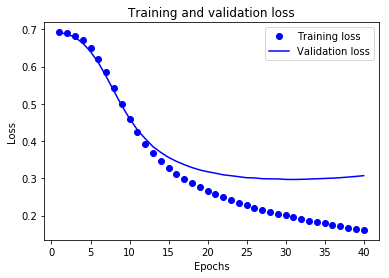

In [14]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()